# Inverse pole figure

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from orix.crystal_map import Phase
from orix.quaternion import Orientation, symmetry
from orix import plot, sampling
from orix.vector import Vector3d


# We'll want our plots to look a bit larger than the default size
new_params = {
    "figure.facecolor": "w",
    "figure.figsize": (20, 7),
    "lines.markersize": 10,
    "font.size": 15,
    "axes.grid": True,
}
plt.rcParams.update(new_params)

Plot color key with minimal setup

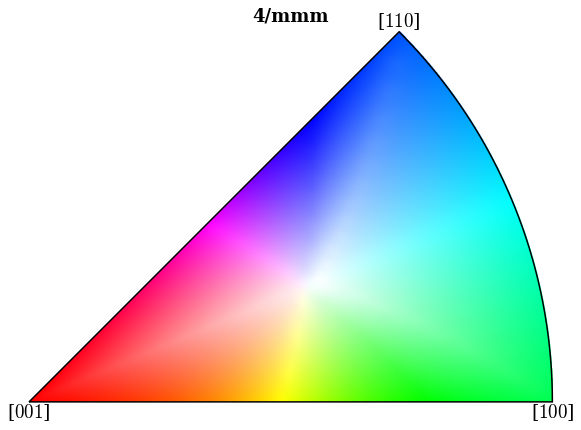

In [2]:
plot.IPFColorKeyTSL(symmetry.D4h).plot()

## Laue groups and corresponding non-centrosymmetric groups

| Schoenflies | Laue            | Non-centrosymmetric        |
| ----------- | --------------- | -------------------------- |
| *Ci*        | $\bar{1}$       | 1                          |
| *C2h*       | 2/*m*           | 2, *m*                     |
| *D2h*       | *mmm*           | 222, 2*mm*                 |
| *S6*        | $\bar{3}$       | 3                          |
| *D3d*       | $\bar{3}$*m*    | 32, 3*m*                   |
| *C4h*       | 4/$m$           | 4, $\bar{4}$               |
| *D4h*       | 4/$mmm$         | 422, $\bar{4}2m$           |
| *C6h*       | 6/$m$           | 6, $\bar{6}$               |
| *D6h*       | 6/*mmm*         | 622, $\bar{6}2m$, 6*mmm*   |
| *Th*        | $m\bar{3}$      | 23                         |
| *Oh*        | $m\bar{3}m$     | 432, $\bar{4}3m$           |

In [3]:
pg_laue = [
    symmetry.Ci,
    symmetry.C2h,
    symmetry.D2h,
    symmetry.S6,
    symmetry.D3d,
    symmetry.C4h,
    symmetry.D4h,
    symmetry.C6h,
    symmetry.D6h,
    symmetry.Th,
    symmetry.Oh,
]

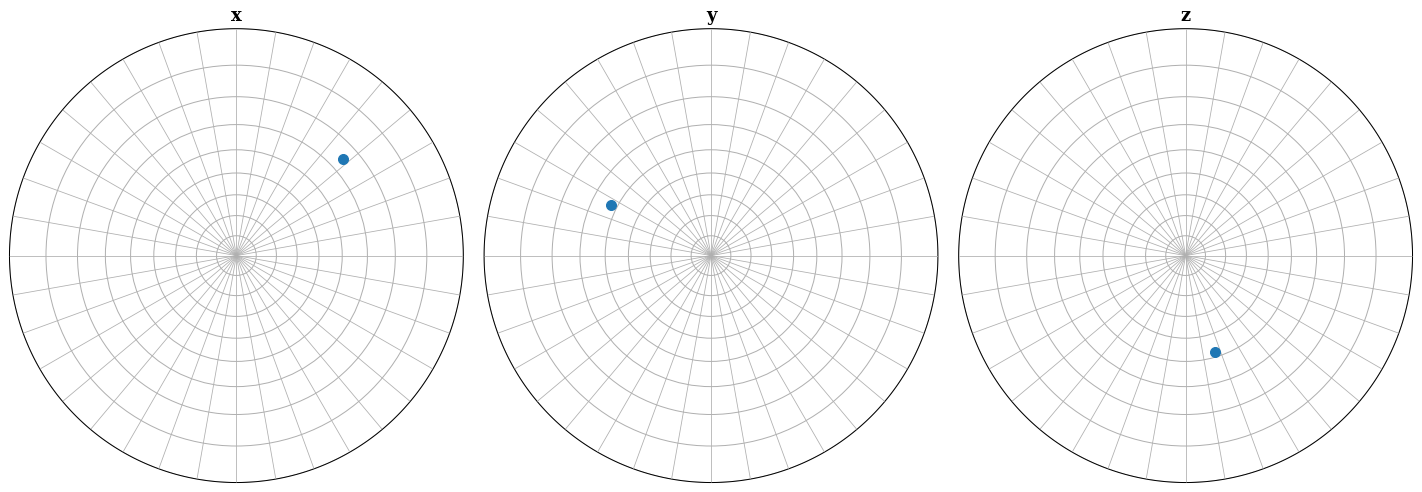

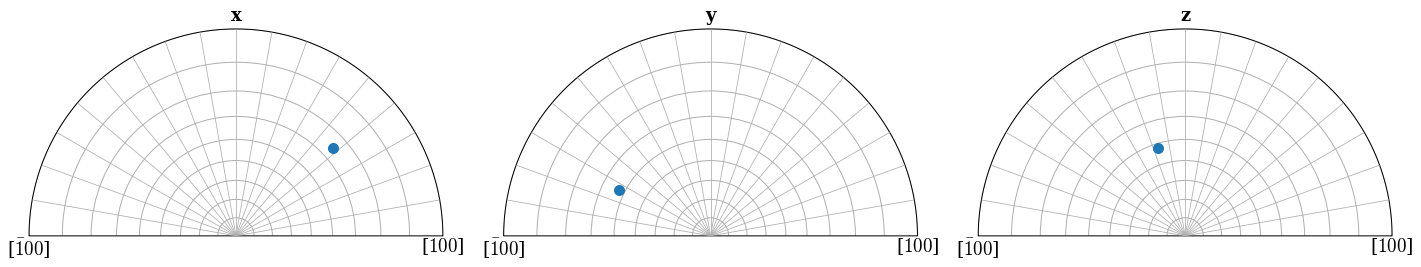

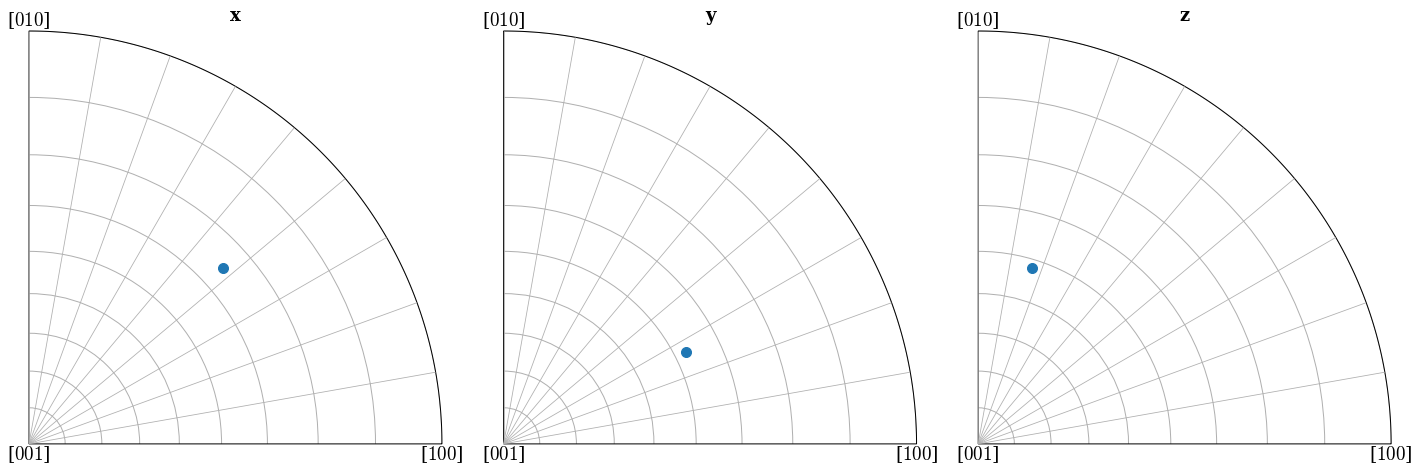

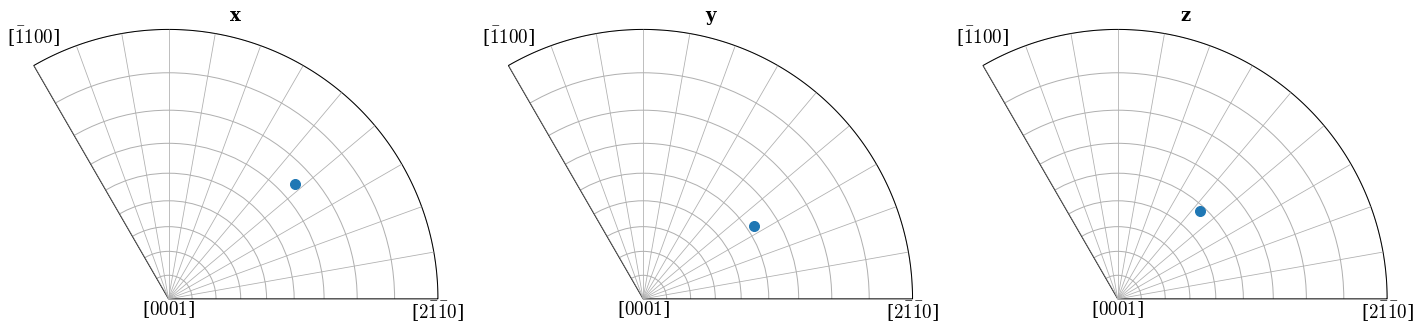

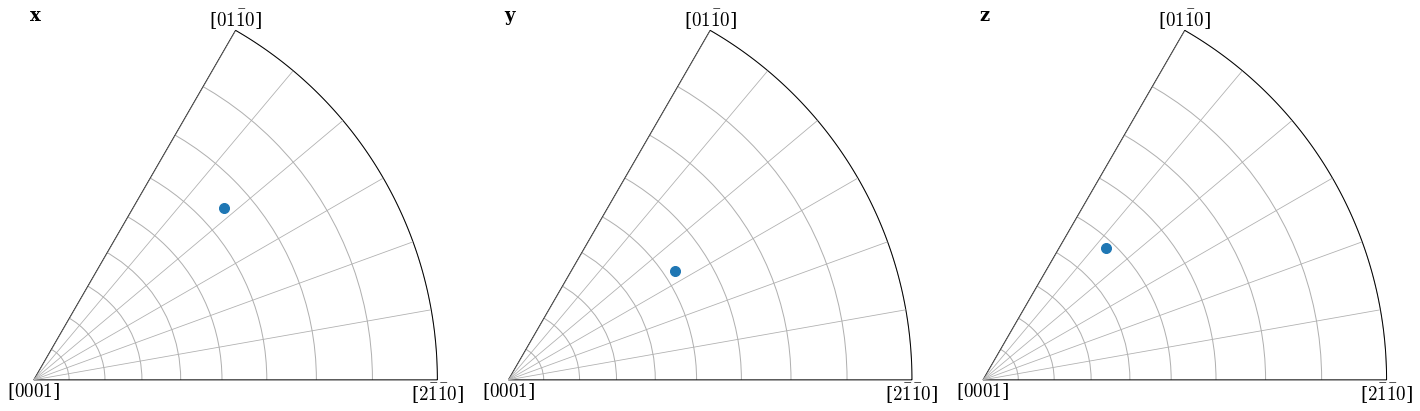

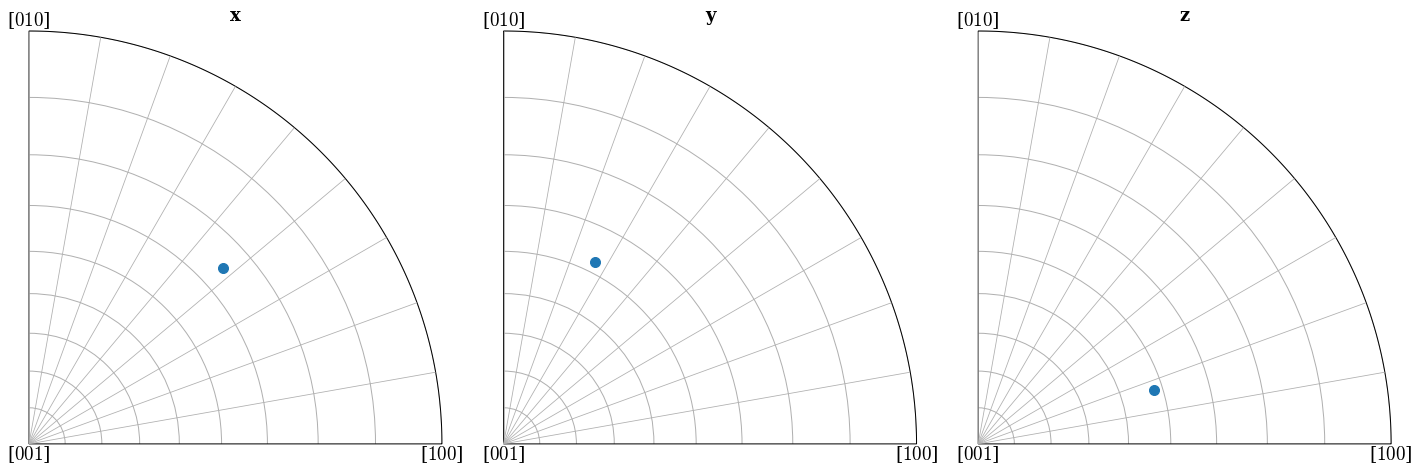

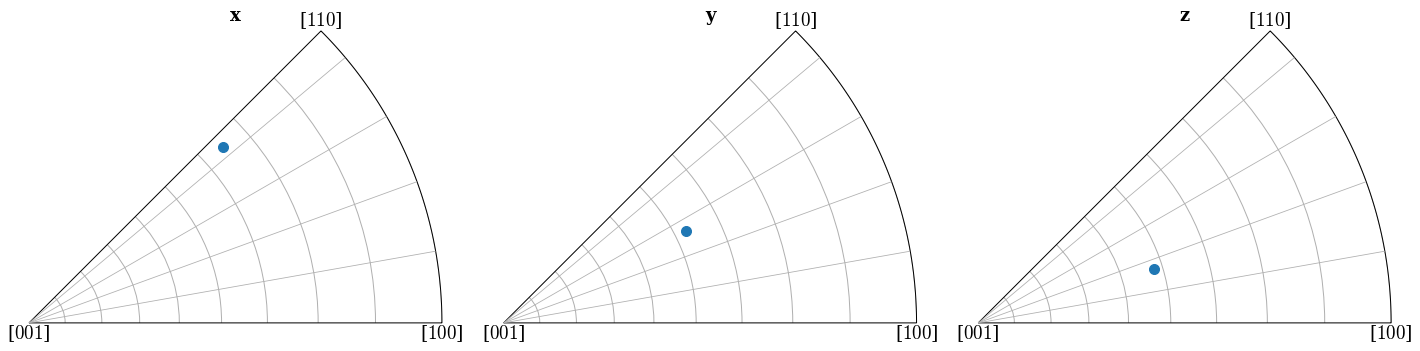

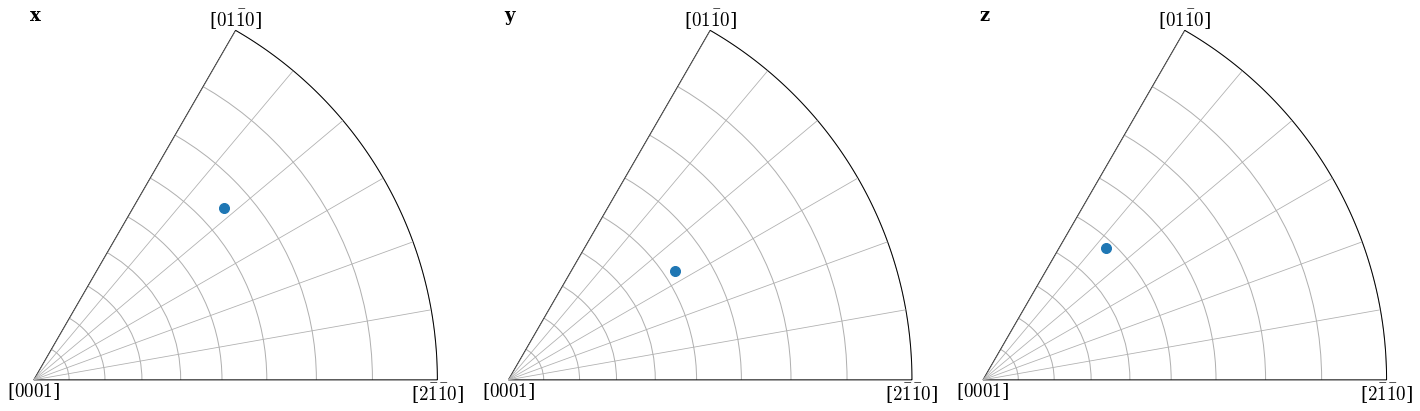

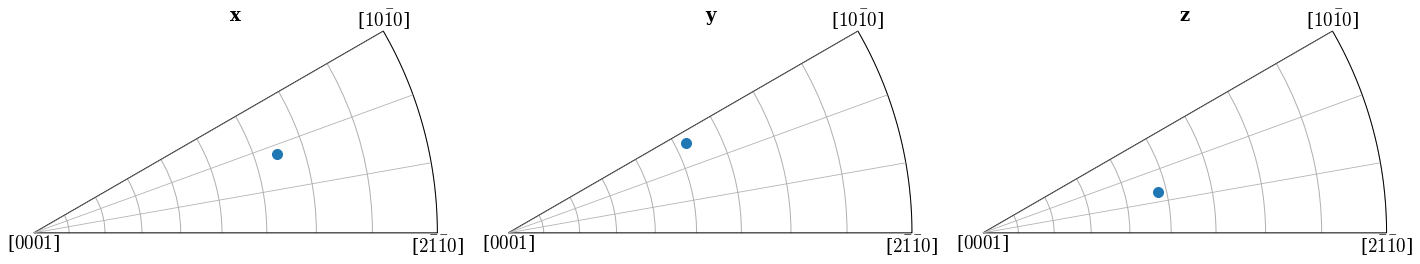

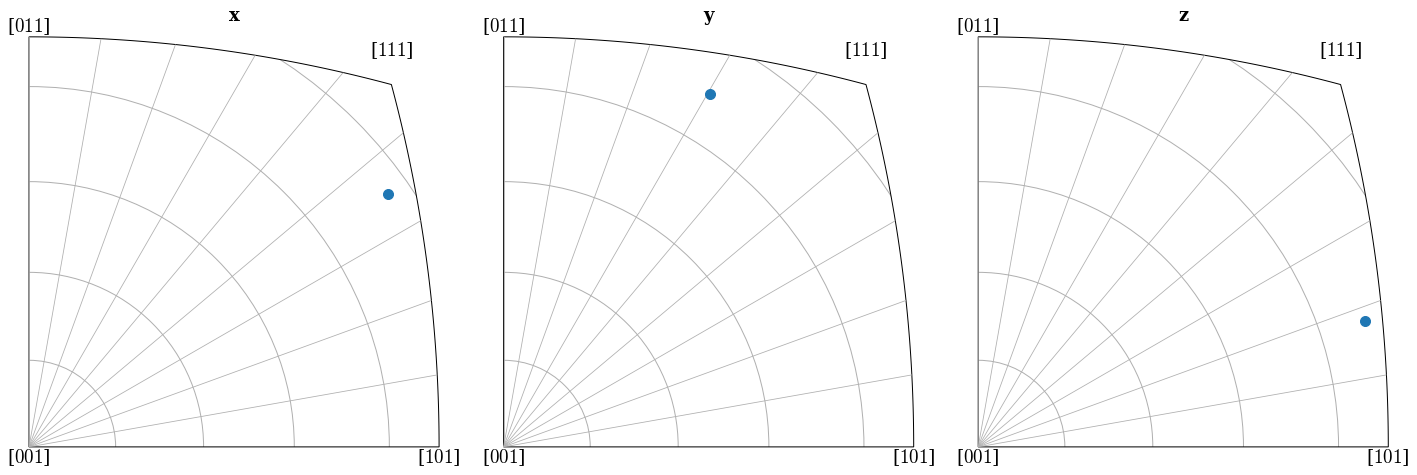

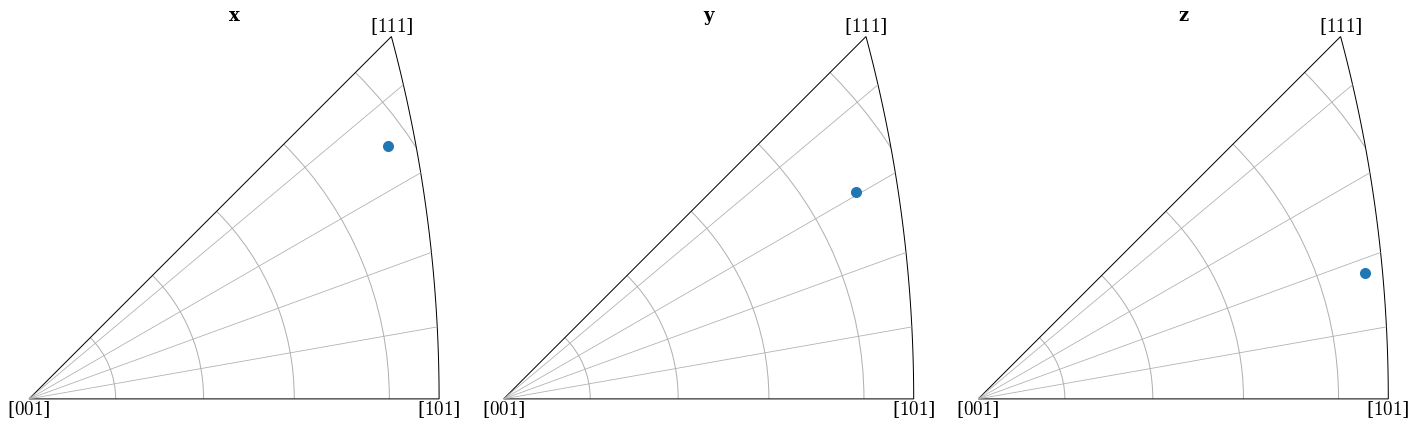

In [4]:
euler = (325, 48, 163)
#euler = (175, 69, 129)

direction = Vector3d(((1, 0, 0), (0, 1, 0), (0, 0, 1)))
kwargs = dict(projection="ipf", direction=direction)

for pg in pg_laue:
    ori = Orientation.from_euler(np.radians(euler), pg)
    ori.scatter(**kwargs)

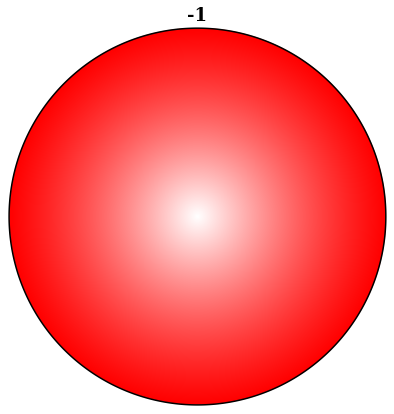

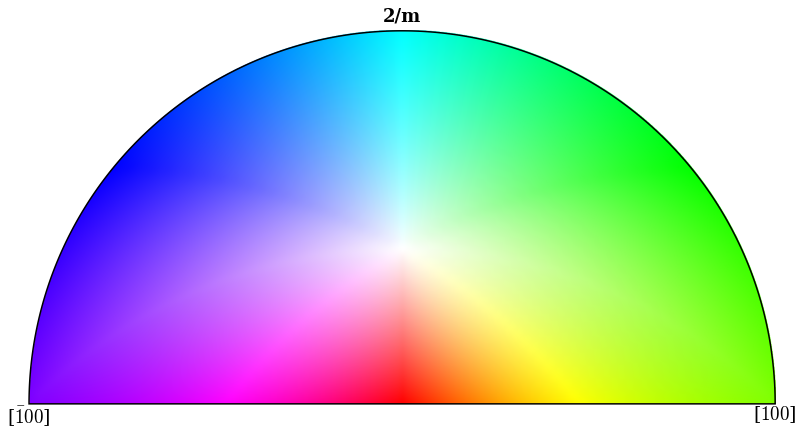

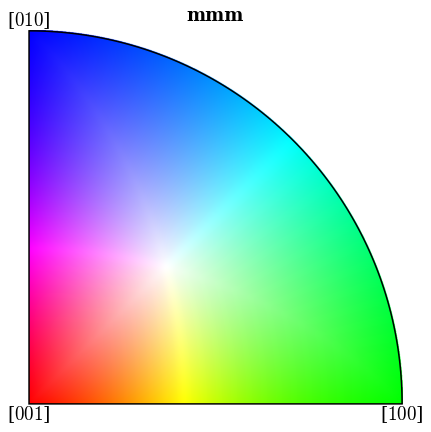

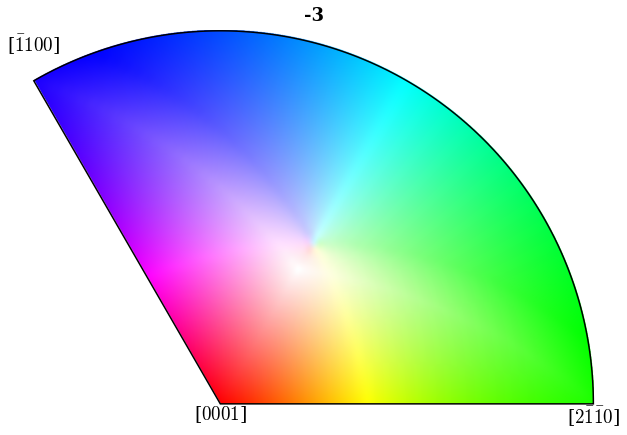

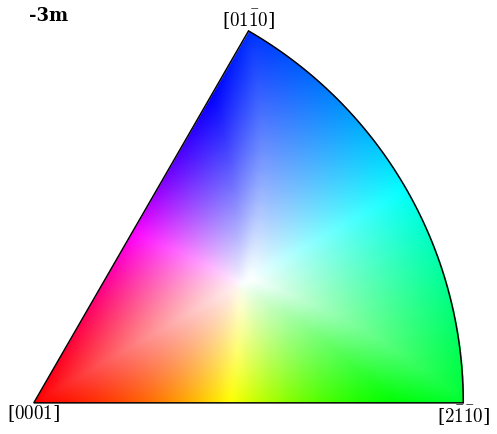

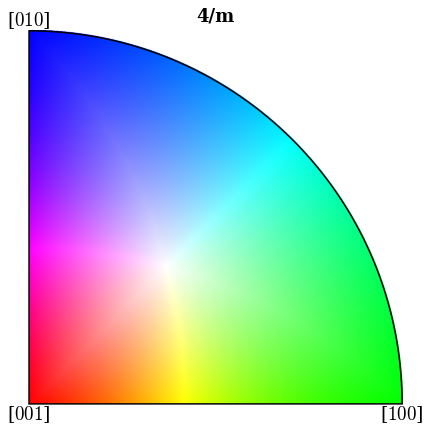

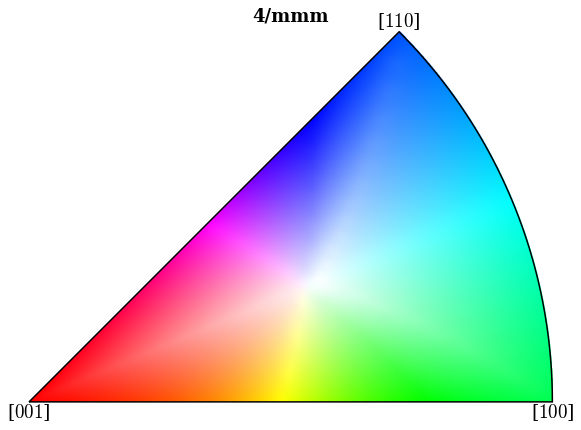

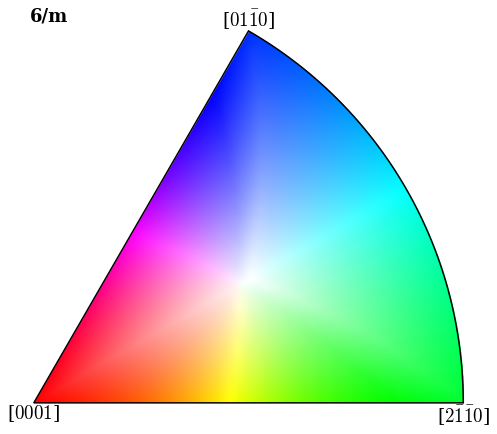

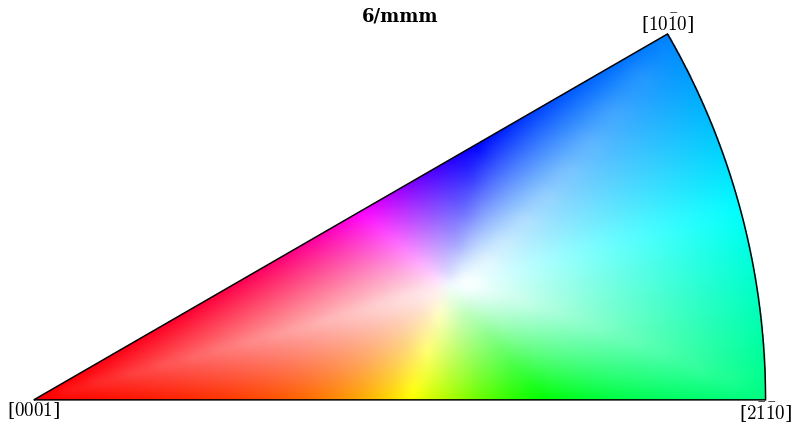

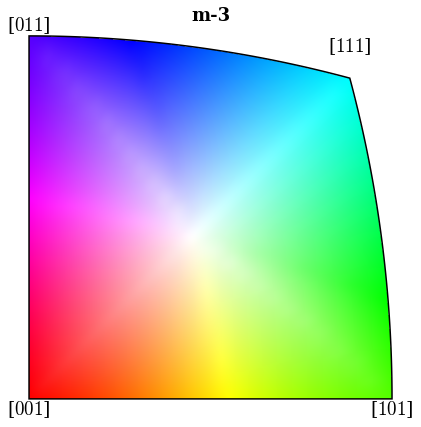

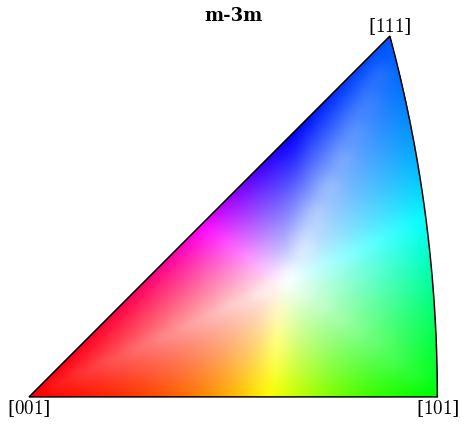

In [6]:
for pg in pg_laue:
    ipfkey = plot.IPFColorKeyTSL(pg)
    ipfkey.plot()

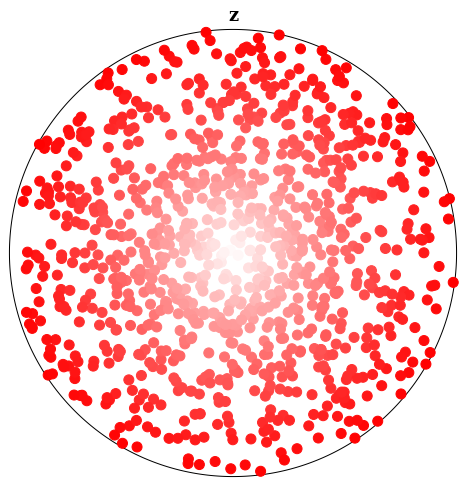

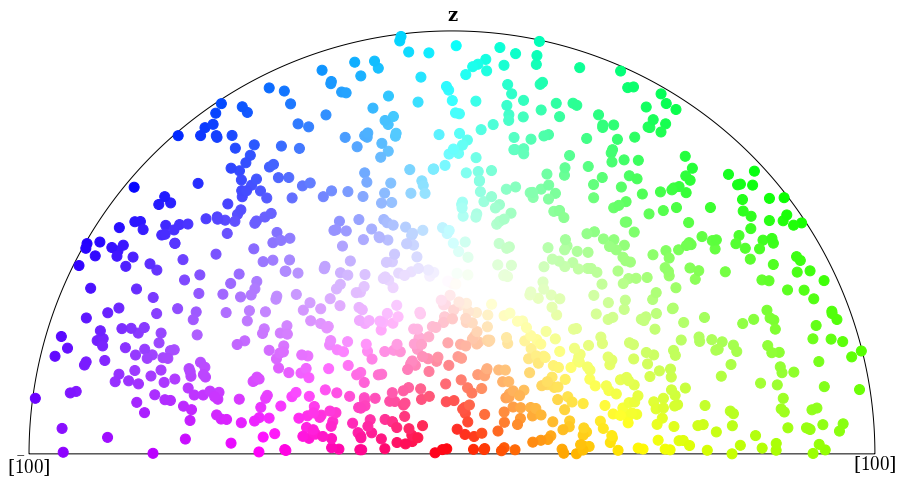

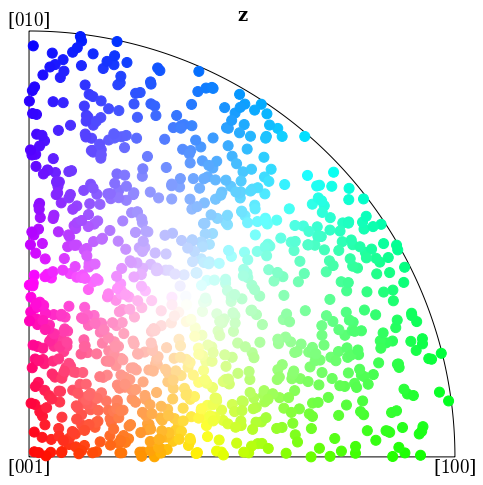

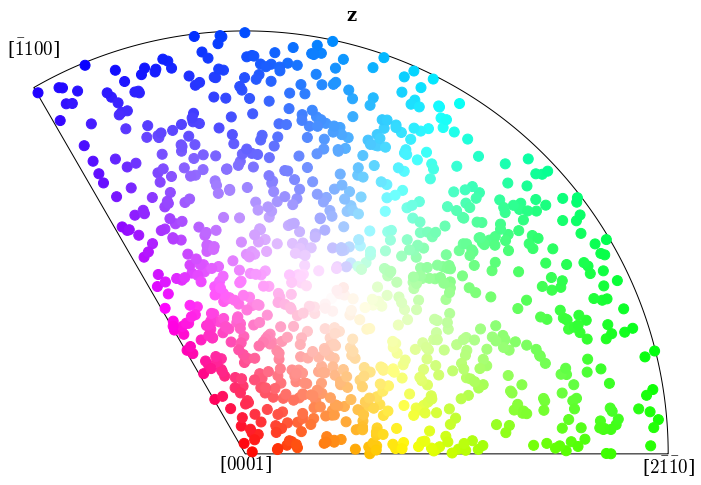

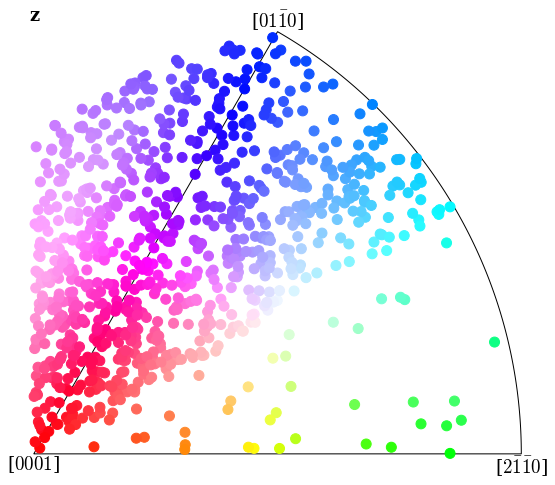

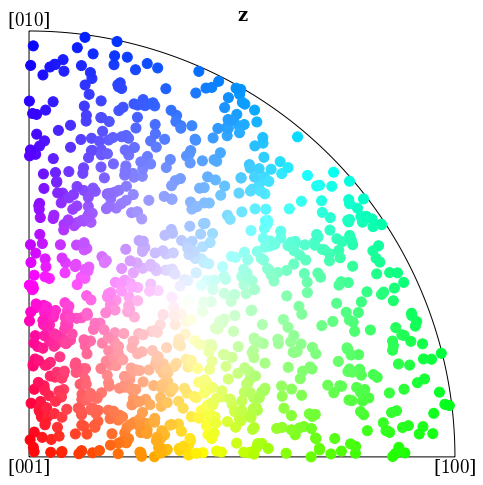

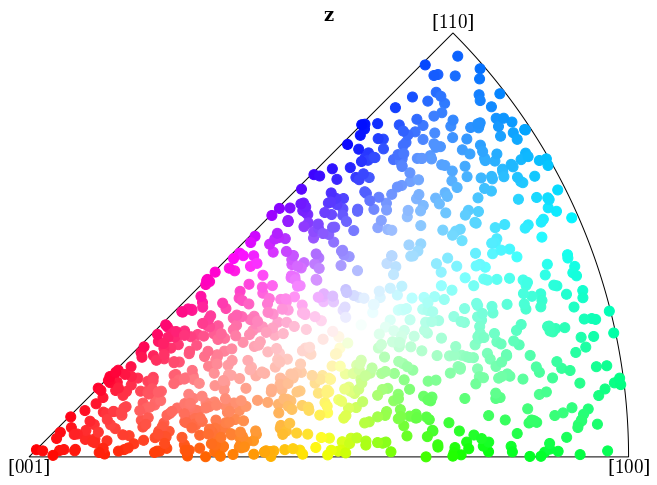

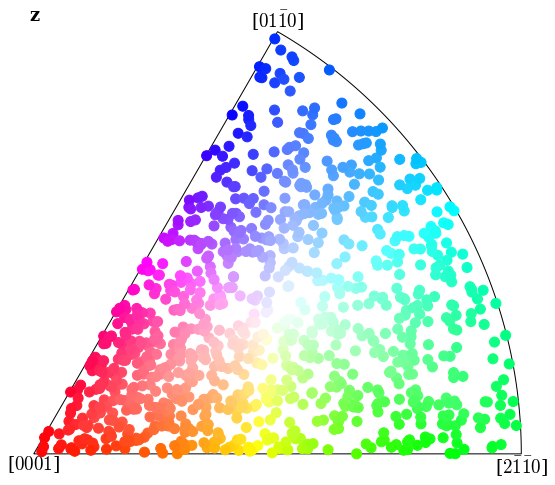

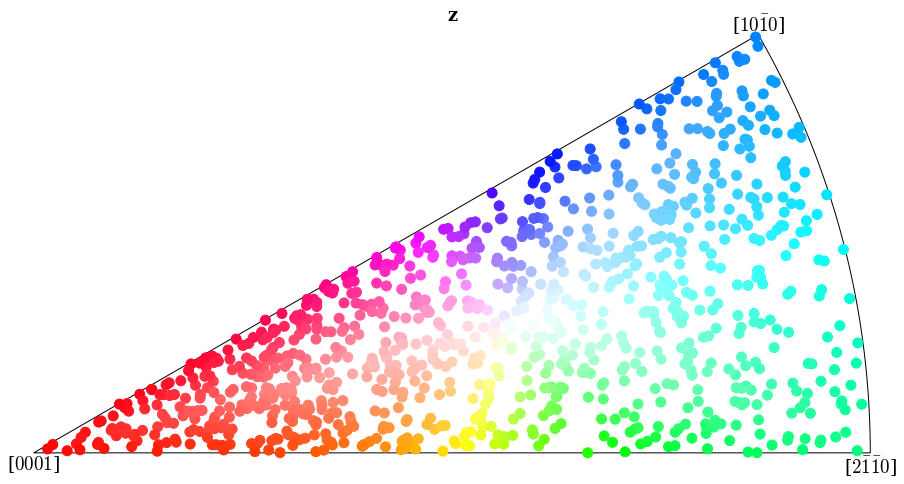

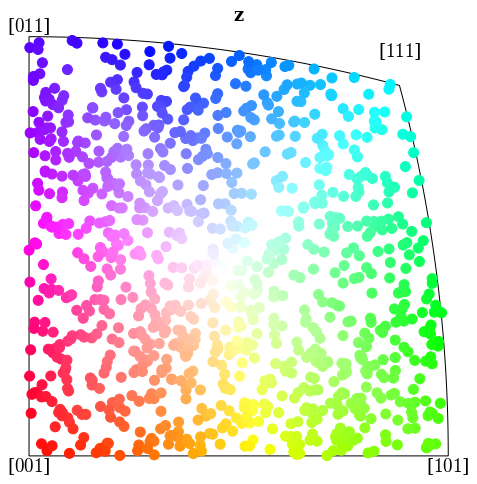

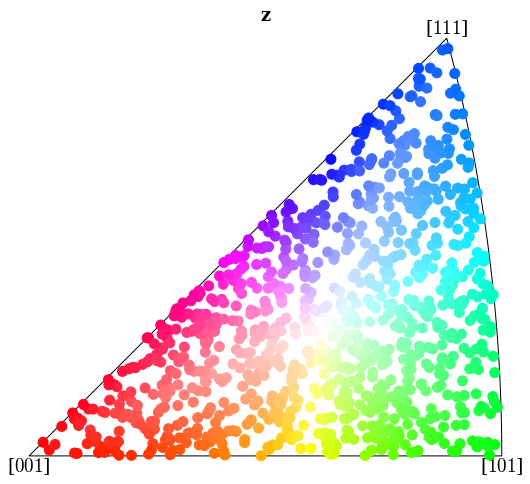

In [7]:
plt.rcParams["axes.grid"] = False

ori2 = Orientation.random(1000)
for pg in pg_laue:
    ipfkey = plot.IPFColorKeyTSL(pg)
    ori2.symmetry = ipfkey.symmetry
    rgb_z = ipfkey.orientation2color(ori2)
    ori2.scatter("ipf", c=rgb_z, direction=ipfkey.direction)